In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

#plt.style.available

# Load data :

### JAFFE

In [3]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [4]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

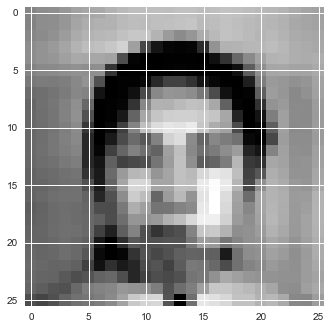

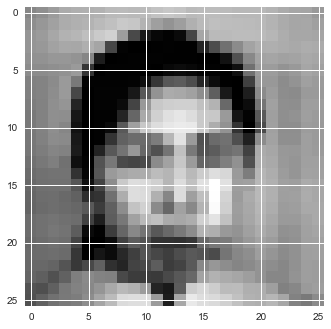

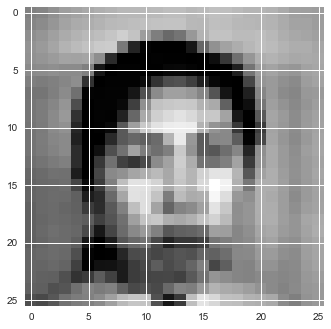

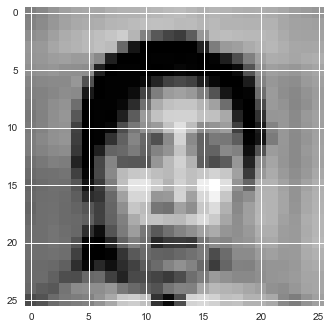

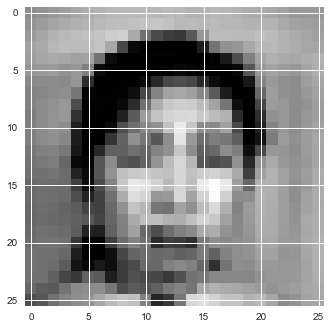

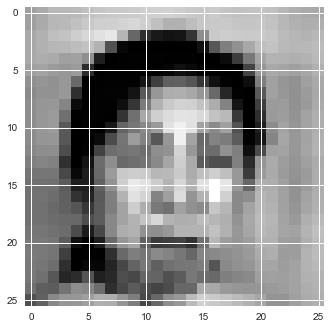

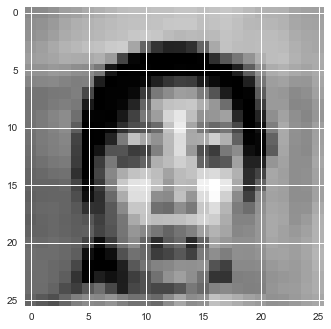

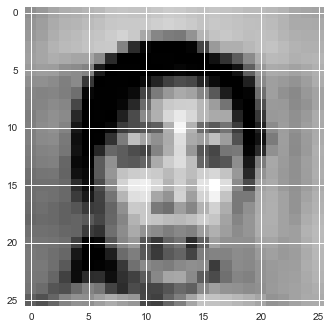

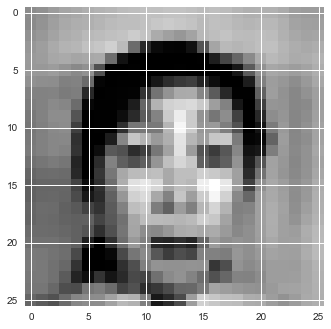

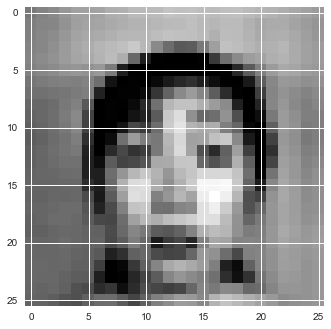

In [5]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [6]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


In [7]:
currentdata = "Jaffe"
dim = 26
shape = X_train.shape[1]

### MNIST

In [ ]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

In [ ]:
train_labels = pd.get_dummies(train_labels.reshape(len(train_labels))).values +0.
eval_labels = pd.get_dummies(eval_labels.reshape(len(eval_labels))).values +0.

In [ ]:
# RANDOM SPLIT MNIST DATASET

X_train, X_test, y_train, y_test = train_test_split( train_data, train_labels, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

In [ ]:
currentdata = "MNIST"
dim = 28

shape = X_train.shape[1]

# Neural network with Random initialisation

In [ ]:
# CREATION DU RESEAU DE NEURONE

sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([shape,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [ ]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [8]:
init0 = tf.random_uniform_initializer()
init1 = tf.contrib.layers.xavier_initializer()
init2 = tf.random_normal_initializer()
init3 = tf.zeros_initializer()

inits = [init0, init1, init2, init3]

acsList = []
lsList = []
initsS = ["entre 0 et 1","xavier", "distribution normal", "zéro"]

for initializer, title in zip(inits, initsS):

    print(title)
    
    try:
        sess.close()
    except NameError:
        sess = None
    # CREATION DU RESEAU DE NEURONE
    sess = tf.Session()

    x = tf.placeholder(tf.float32, shape=[None, shape])

    # XAVIER INITIALIZER
    #initializer =  tf.contrib.layers.xavier_initializer()

    # NORMAL DISTRIBUTION
    #initializer = tf.random_normal_initializer()

    # ZEROS INITIALIZER
    #initializer = tf.zeros

    W1 = tf.Variable(initializer([shape,100]))
    b1 = tf.Variable(initializer([100]))

    y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

    W2 = tf.Variable(initializer([100,50]))
    b2 = tf.Variable(initializer([50]))

    y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

    W3 = tf.Variable(initializer([50,10]))
    b3 = tf.Variable(initializer([10]))

    y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))

    LEARNING_RATE = 0.1

    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(tf.global_variables_initializer())


    # TRAINING : 

    acs = []
    ls = []

    number_of_epoch = 1000

    for i in range(number_of_epoch):
        ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
        l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
        sess.run(training,feed_dict={x : X_train, y_ : y_train})
        acs.append(ac)
        ls.append(l)
        if(i%10 == 0):
            print("epoch : ", i, "/", number_of_epoch, end=", ")
            print("accuracy : " , ac, end=", ")
            print("loss : ",l )
    acsList.append(acs)
    lsList.append(ls)

entre 0 et 1
epoch :  0 / 1000, accuracy :  0.12962963, loss :  4.39284
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2454178
epoch :  20 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  30 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  40 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  50 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  60 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  70 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  80 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  90 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  100 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  110 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  120 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  130 / 1000, accuracy :  0.074074075, loss :  3.243195
epoch :  140 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  150 / 1000, accuracy :  0.0740740

epoch :  290 / 1000, accuracy :  0.4814815, loss :  2.528943
epoch :  300 / 1000, accuracy :  0.5, loss :  2.463662
epoch :  310 / 1000, accuracy :  0.537037, loss :  2.3968935
epoch :  320 / 1000, accuracy :  0.537037, loss :  2.3292022
epoch :  330 / 1000, accuracy :  0.5740741, loss :  2.261054
epoch :  340 / 1000, accuracy :  0.6111111, loss :  2.1928055
epoch :  350 / 1000, accuracy :  0.6111111, loss :  2.1247106
epoch :  360 / 1000, accuracy :  0.6111111, loss :  2.0569398
epoch :  370 / 1000, accuracy :  0.6666667, loss :  1.9896008
epoch :  380 / 1000, accuracy :  0.6851852, loss :  1.9227637
epoch :  390 / 1000, accuracy :  0.7222222, loss :  1.8564844
epoch :  400 / 1000, accuracy :  0.7777778, loss :  1.7908224
epoch :  410 / 1000, accuracy :  0.7962963, loss :  1.7258564
epoch :  420 / 1000, accuracy :  0.7962963, loss :  1.6616918
epoch :  430 / 1000, accuracy :  0.8333333, loss :  1.5984616
epoch :  440 / 1000, accuracy :  0.8333333, loss :  1.5363216
epoch :  450 / 1000

epoch :  660 / 1000, accuracy :  0.9814815, loss :  0.05265646
epoch :  670 / 1000, accuracy :  0.9814815, loss :  0.051671293
epoch :  680 / 1000, accuracy :  0.9814815, loss :  0.050719243
epoch :  690 / 1000, accuracy :  0.9814815, loss :  0.049798608
epoch :  700 / 1000, accuracy :  0.9814815, loss :  0.04890784
epoch :  710 / 1000, accuracy :  0.9814815, loss :  0.04804543
epoch :  720 / 1000, accuracy :  0.9814815, loss :  0.04721007
epoch :  730 / 1000, accuracy :  0.9814815, loss :  0.046400454
epoch :  740 / 1000, accuracy :  0.9814815, loss :  0.045615368
epoch :  750 / 1000, accuracy :  0.9814815, loss :  0.044853773
epoch :  760 / 1000, accuracy :  0.9814815, loss :  0.044114597
epoch :  770 / 1000, accuracy :  0.9814815, loss :  0.04339692
epoch :  780 / 1000, accuracy :  0.9814815, loss :  0.042699855
epoch :  790 / 1000, accuracy :  0.9814815, loss :  0.042022526
epoch :  800 / 1000, accuracy :  0.9814815, loss :  0.041364174
epoch :  810 / 1000, accuracy :  0.9814815, l

epoch :  970 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  980 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  990 / 1000, accuracy :  0.074074075, loss :  3.2431955


PermissionError: [Errno 13] Permission denied: 'plot/Initialisation entre 0 et 1 - Jaffe.pdf'

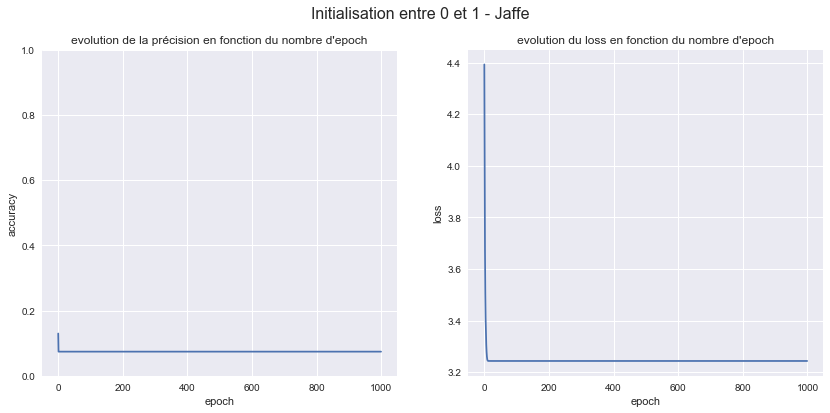

In [9]:
titles = ["Initialisation entre 0 et 1 - "+currentdata,
          "Initialisation avec Xavier - "+currentdata,
          "Initialisation avec une distribution normal - "+currentdata,
          "Initialisation à zéro - "+currentdata]

for acs, ls, title in zip(acsList, lsList, titles):
    plt.figure(figsize=(14, 6))

    ax = plt.subplot(121)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(acs)
    plt.ylim(0,1)

    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("evolution de la précision en fonction du nombre d'epoch")

    ax = plt.subplot(122)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(ls)

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("evolution du loss en fonction du nombre d'epoch")

    plt.suptitle(title, size=16)

    #plt.tight_layout()
    #plt.show()
    plt.savefig("plot/"+title+".png", bbox_inches='tight')
    plt.savefig("plot/"+title+".pdf", bbox_inches='tight')
    

In [ ]:
sess.close()

# AUTO ENCODER

In [ ]:
sess = tf.Session()


learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, shape])

# encoder layers : 

w1 = tf.Variable(initializer([shape, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, shape]))
b4 = tf.Variable(initializer([shape]))

predictW =  tf.Variable(initializer([50, 10]))
predictB =  tf.Variable(initializer([10]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

LEARNING_RATE = 0.1

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# TRAINING PART OF THE NEURAL NETWORK :

y = tf.nn.softmax(tf.add(tf.matmul(layer_2,predictW),predictB))
y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
for i in range(500):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(100):
    image = img_reconstructed[i].reshape([dim,dim])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()


In [ ]:
# TRAINING : 

acs_AE = []
ls_AE = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={X : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={X : X_train, y_ : y_train})
    sess.run(training,feed_dict={X : X_train, y_ : y_train})
    acs_AE.append(ac)
    ls_AE.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l )

In [ ]:
title = "Initialisation avec auto encoder - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_AE)
plt.ylim(0,1)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_AE)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')
plt.savefig("plot/"+title+".pdf", bbox_inches='tight')

In [ ]:
sess.close()

# PCA saving weights

In [ ]:
data = X_train.copy()

m = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx][:,:100]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx][:,:50]
inertia = evals[idx]

Rm2 =np.dot(m2,R2)
respca = np.dot(data, R2) - Rm2

# Neural network with PCA init

In [ ]:
# CREATION DU RESEAU DE NEURONE

sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(tf.constant(R.astype("float32")))
b1 = tf.Variable(tf.constant(-Rm.astype("float32")))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(tf.constant(R2.astype("float32")))
b2 = tf.Variable(tf.constant(-Rm2.astype("float32")))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(np.random.normal(0,1,[50,10]).astype("float32"))
b3 = tf.Variable(np.random.normal(0,1,[10]).astype("float32"))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [ ]:
# TRAINING : 

acs_PCA= []
ls_PCA = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_PCA.append(ac)
    ls_PCA.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        print()
        

In [ ]:
sess.close()

In [ ]:
title =  "Initialisation avec PCA - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_PCA)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_PCA)


plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')
plt.savefig("plot/"+title+".pdf", bbox_inches='tight')

# plot poster

In [ ]:
title = "Comparaison des initialisations - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acsList[0], label="aleatoire entre 0 et 1", linestyle=":", color="blue", alpha=1, linewidth=4)
plt.plot(acsList[1], label="aleatoire xavier", linestyle=":", color="magenta", alpha=0.7, linewidth=3)
plt.plot(acsList[2], label="aleatoire distrib normal", linestyle=":", color="green", alpha=0.7, linewidth=3)
plt.plot(acsList[3], label="zéro", linestyle=":", color="red", alpha=0.7, linewidth=2)
plt.plot(acs_AE, label="auto encoder", linestyle=":", color="purple", alpha=0.7, linewidth=3)
plt.plot(acs_PCA, label="pca", linestyle=":", color="orange", alpha=0.7, linewidth=3)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")
plt.legend()

plt.plot
ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(lsList[0], label="aleatoire entre 0 et 1", linestyle=":", color="blue", alpha=0.7, linewidth=3)
plt.plot(lsList[1], label="aleatoire xavier", linestyle=":", color="magenta", alpha=0.7, linewidth=3)
plt.plot(lsList[2], label="aleatoire distrib normal", linestyle=":", color="green", alpha=0.7, linewidth=3)
plt.plot(lsList[3], label="zéro", linestyle=":", color="red", alpha=0.7, linewidth=2)
plt.plot(ls_AE, label="auto encoder", linestyle=":", color="purple", alpha=0.7, linewidth=3)
plt.plot(ls_PCA, label="pca", linestyle=":", color="orange", alpha=0.7, linewidth=3)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")
plt.legend()

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')
plt.savefig("plot/"+title+".pdf", bbox_inches='tight')
